In [1]:
#-------------------------------------------------------------------------------------------
# ENERGY DEPOSITION PROFILE SHOWERS
#-------------------------------------------------------------------------------------------
#
#    - Reads dEdr...dat files for 1 shower generated by CORSIKA-IW
#    - Creates file with energy deposition wr shower depth and radial distance to be used by thermo-acoustic model scripts
#    - Creates mean energy deposition file
#    - Plots energy deposition profiles
#
#-------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [3]:
files_dir = "/data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/"

num_files = 4                # nr files
num_showers_file = 1           # nr showers / file
seed_i = 400                   # initial seed    

energies = np.arange(11,12)    # exponent energy (in GeV)
facts_energy = np.asarray([5]) # multiplicative factor energy
length_i = 1825                # nr longitudinal steps input
length_o = 1000                # nr longitudinal steps output
width  = 20                    # nr radial steps

cut = False                     # cut energy deposition
cut_c = False                    # cut energy deposition and cut out the zeros

bins_cut = 60                  # nr bins to cut

print(bins_cut*20/1.025/100)

seeds = np.arange(seed_i,seed_i+num_files,1)

11.707317073170731


In [4]:
for energy in energies:
    for fact_energy in facts_energy:
        print("Shower energy: ",fact_energy,"e",energy)
        
        dEdzdr = np.zeros((num_files,length_o,width))
        mean_dEdzdr = np.zeros((length_o,width))

        for idx_s,seed in enumerate(seeds):
            print("Seed: ",seed)

            input_file = files_dir + 'cg_dEdr_{:01d}{:02d}00_{:}.dat'.format(fact_energy,energy,seed)
            f = open(input_file, 'r')
            lines = f.readlines()
            
            print("Input file: ",input_file)

            for idx_shower in range(num_showers_file):
                print("Shower nr: ",idx_shower)
                
                for idx_line in range(length_o):
                    
                    string = lines[idx_line+length_i*idx_shower].split()

                    if cut == False:
                        dEdzdr[idx_shower+idx_s,idx_line,:] = [float(i) for i in string[1:width+1]]    
                    else:
                        if idx_line > bins_cut:
                            dEdzdr[idx_shower+idx_s,idx_line,:] = [float(i) for i in string[1:width+1]]               
                    
                print("Deposited energy: ", "%10.3E" % (np.sum(dEdzdr[idx_shower+idx_s,:,:])))
                
                if cut == True:
                    output_file = files_dir + 'dEdzdr_{:01d}{:02d}00_{:}_cut.dat'.format(fact_energy,energy,seed)
                if cut_c == True:
                    output_file = files_dir + 'dEdzdr_{:01d}{:02d}00_{:}_cut_c.dat'.format(fact_energy,energy,seed)
                else:
                    output_file = files_dir + 'dEdzdr_{:01d}{:02d}00_{:}.dat'.format(fact_energy,energy,seed)

                if cut_c == True:
                    dEdzdr_copy = np.zeros((num_files,length_o,width))
                    l = len(dEdzdr[idx_shower+idx_s,bins_cut:,0])
                    dEdzdr_copy[idx_shower+idx_s,0:l,:] = dEdzdr[idx_shower+idx_s,bins_cut:,:]
                    np.savetxt(output_file,dEdzdr_copy[idx_shower+idx_s,:,:],fmt='%1.4e') 
                else:
                    np.savetxt(output_file,dEdzdr[idx_shower+idx_s,:,:],fmt='%1.4e') 
                
                print("Output file: ",output_file)



Shower energy:  5 e 11
Seed:  400
Input file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/cg_dEdr_51100_400.dat
Shower nr:  0
Deposited energy:   4.820E+11
Output file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/dEdzdr_51100_400.dat
Seed:  401
Input file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/cg_dEdr_51100_401.dat
Shower nr:  0
Deposited energy:   4.812E+11
Output file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/dEdzdr_51100_401.dat
Seed:  402
Input file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/cg_dEdr_51100_402.dat
Shower nr:  0
Deposited energy:   4.808E+11
Output file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/dEdzdr_51100_402.dat
Seed:  403
Input file:  /data/antares/users/cgatius/nu_acoustic_detection/corsika_output/outputs_May22/cg_dEdr_51100_403.dat
Sho

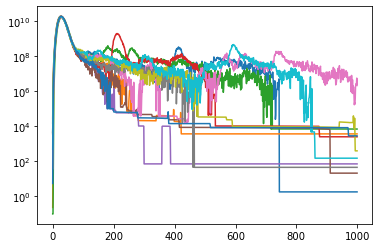

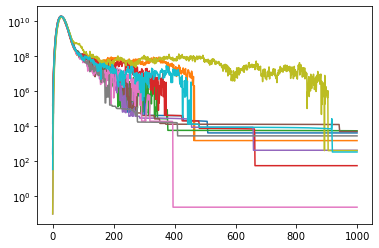

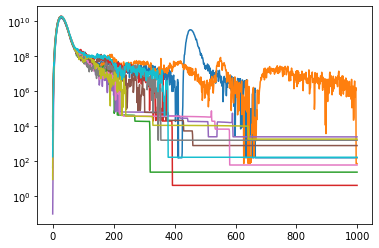

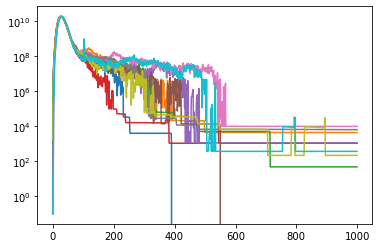

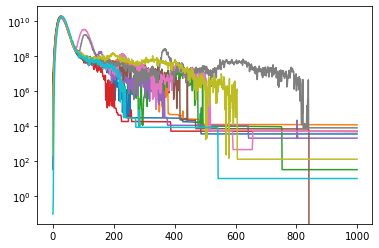

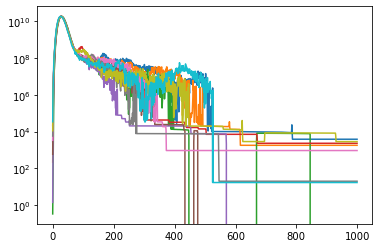

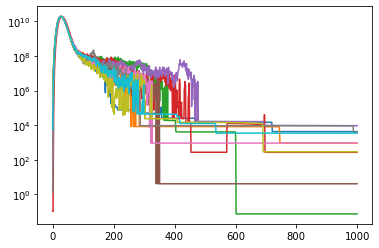

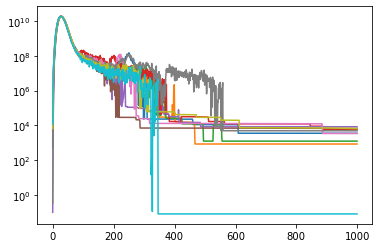

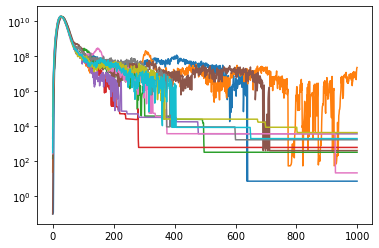

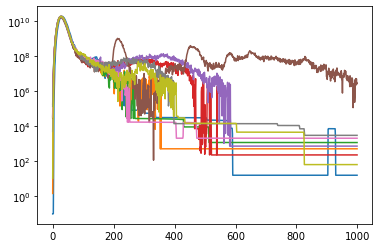

In [5]:
# GeV vs steps, 20 gr/cm3

for i in range(100):
    plt.plot(np.sum(dEdzdr[i,:,:],1))
    plt.yscale('log')
    plt.xlabel("z (m)")
    plt.ylabel("")
    if i != 0 and i%10 == 0:
        plt.show()

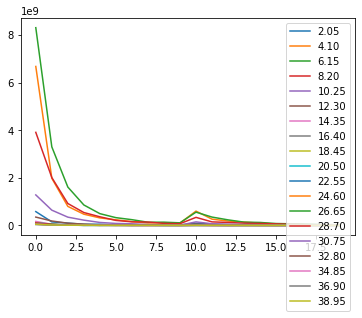

In [103]:
# GeV vs steps

for i in range(10,200,10):
    l = i*20*1.025/100
    plt.plot(dEdzdr[0,i,:],label="%.2f" %l)
    #plt.yscale('log')
    #if i != 0 and i%10 == 0:
    #plt.show()
plt.legend()

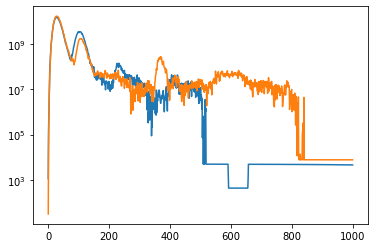

In [9]:
plt.plot(np.sum(dEdzdr[47,:,:],1))
plt.plot(np.sum(dEdzdr[48,:,:],1))

plt.yscale('log')

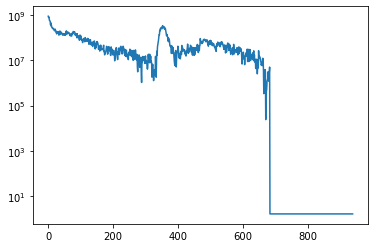

In [139]:
plt.plot(np.sum(dEdzdr[0,bins_cut:,:],1))

plt.yscale('log')

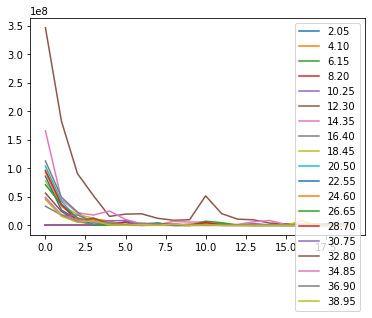

In [98]:
# GeV vs steps

for i in range(10,200,10):
    l = i*20*1.025/100
    plt.plot(dEdzdr[0,i,:],label="%.2f" %l)
    #plt.yscale('log')
    #if i != 0 and i%10 == 0:
    #plt.show()
plt.legend()

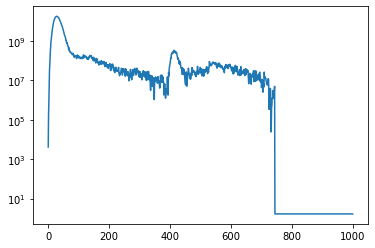

In [12]:
plt.plot(np.sum(dEdzdr[0,:,:],1))

plt.yscale('log')